In [1]:
from keras.datasets import mnist

In [16]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

In [5]:
X_train.shape

(60000, 28, 28)

In [7]:
single_image=X_train[0]

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

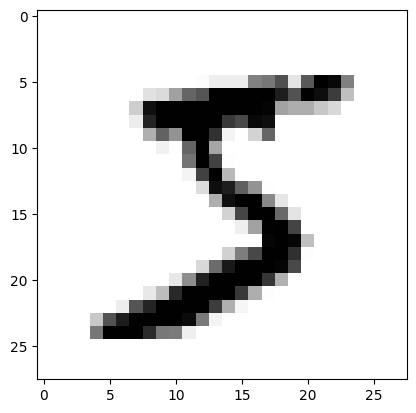

In [11]:
plt.imshow(single_image,cmap='gray_r')

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
from keras.utils import to_categorical


In [17]:
y_cat_test=to_categorical(y_test,10)
y_cat_train=to_categorical(y_train,10)

In [18]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [19]:
single_image.max()

255

In [20]:
#normalize this image to be between 0 and 1
X_train=X_train/255

In [21]:
X_test=X_test/X_test.max()

In [22]:
X_test.max()

1.0

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
X_train=X_train.reshape(60000,28,28,1)

In [25]:
X_test=X_test.reshape(10000,28,28,1)

In [26]:
from keras.model import Sequential

ModuleNotFoundError: No module named 'keras.model'